# Lifetime models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from relife.data import load_circuit_breaker

Here is a toy datasets that contains the following 15 first data

In [2]:
data = load_circuit_breaker()
print(data["time"])
print(data["event"])
print(data["entry"])

[34. 28. 12. ... 42. 42. 37.]
[ True  True  True ... False False False]
[33. 27. 11. ... 31. 31. 26.]


## Non parametric lifetime models

In [3]:
from relife.lifetime_model import KaplanMeier, NelsonAalen

In [4]:
km = KaplanMeier()
km.fit(data["time"], event=data["event"], entry=data["entry"])
na = NelsonAalen()
na.fit(data["time"], event=data["event"], entry=data["entry"])

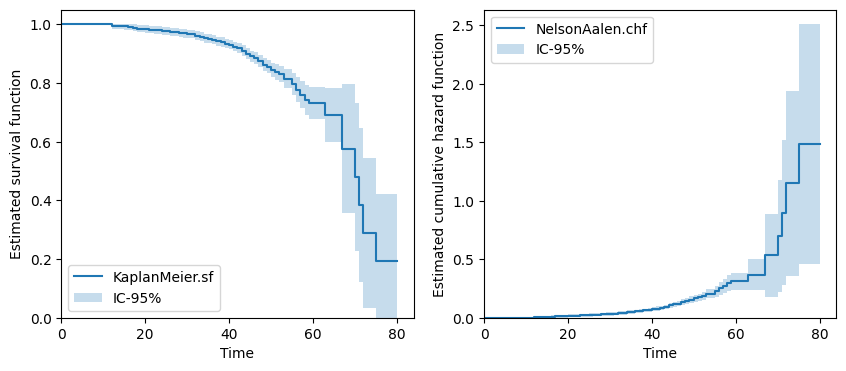

In [5]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
km.plot.sf(ax=axs[0])
na.plot.chf(ax=axs[1])
plt.show()

## Lifetime distribution models

In [6]:
from relife.lifetime_model import Weibull, Gompertz

Here is a toy datasets that contains the following 15 first data

One can instanciate a Weibull distribution model as follow

In [7]:
weibull = Weibull()
gompertz = Gompertz()

From now, the models parameters are unknown, thus set to `np.nan`

In [8]:
print(weibull.params_names)
print(weibull.params)

('shape', 'rate')
[nan nan]


One can fit the model. You can either return a new fitted instance or fit the model inplace

In [9]:
weibull.fit(data["time"], event=data["event"], entry=data["entry"])
print(weibull.fitting_results)

fitted params : [3.72675, 0.0123233]
AIC           : 2493.72
AICc          : 2493.72
BIC           : 2506.41


In [10]:
gompertz.fit(data["time"], event=data["event"], entry=data["entry"])
print(gompertz.fitting_results)

fitted params : [0.00390781, 0.0757955]
AIC           : 2485.57
AICc          : 2485.57
BIC           : 2498.25


To plot the survival function, do the following

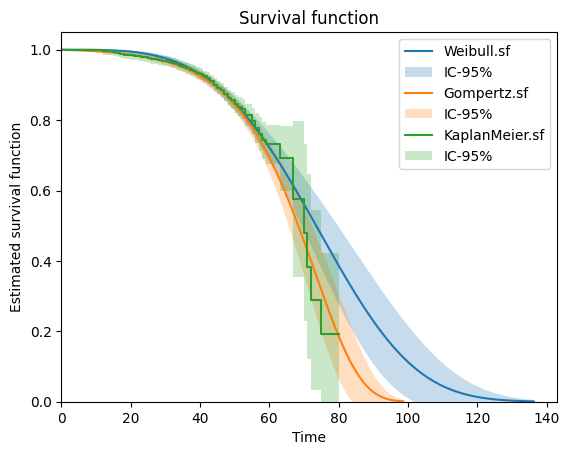

In [11]:
weibull.plot.sf()
gompertz.plot.sf()
km.plot.sf()
plt.show()

## Lifetime regression models

In [12]:
import numpy as np
from relife.lifetime_model import ProportionalHazard, Weibull, Gompertz
from relife.data import load_insulator_string

In [13]:
data = load_insulator_string()
print(data.dtype.names)

('time', 'event', 'entry', 'pHCl', 'pH2SO4', 'HNO3')


In [14]:
print(data["pHCl"])

[0.49 0.76 0.43 ... 1.12 1.19 0.35]


In [15]:
covar = np.column_stack((data["pHCl"], data["pH2SO4"], data["HNO3"]))
print(covar.shape)

(12000, 3)


In [16]:
ph = ProportionalHazard(Gompertz())
ph.fit(data["time"], covar, event=data["event"], entry=data["entry"])

In [17]:
print(ph.params, ph.params_names)

[ 4.11139839 -2.67864095  3.24298564  0.22415155  0.02944536] ('coef_1', 'coef_2', 'coef_3', 'shape', 'rate')


<Axes: title={'center': 'Hazard function'}, xlabel='t', ylabel='$h(t)$'>

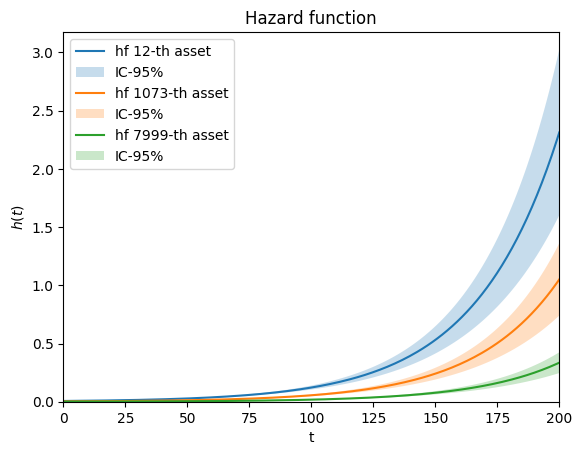

In [18]:
# plot hazard function for some individuals
i, j, k = 12, 1073, 7999
ph.plot.hf(covar[i], end_time=200, label=f"hf {i}-th asset")
ph.plot.hf(covar[j], end_time=200, label=f"hf {j}-th asset")
ph.plot.hf(covar[k], end_time=200, label=f"hf {k}-th asset")

<Axes: title={'center': 'Survival function'}, xlabel='t', ylabel='$S(t) = P(T > t)$'>

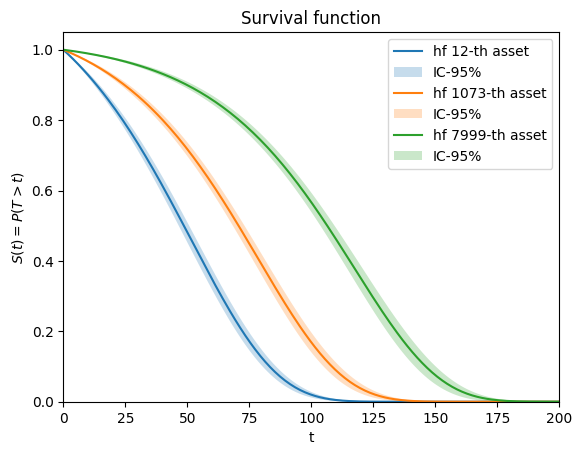

In [19]:
# plot hazard function for some individuals
i, j, k = 12, 1073, 7999
ph.plot.sf(covar[i], end_time=200, label=f"hf {i}-th asset")
ph.plot.sf(covar[j], end_time=200, label=f"hf {j}-th asset")
ph.plot.sf(covar[k], end_time=200, label=f"hf {k}-th asset")